# ECON526: Quantitative Economics with Data Science Applications

Probability and Uncertainty

Jesse Perla

# Overview

## Summary

-   Will provide background on probability, simulation of randomness,
    independence, and expectations
-   See the following for extra material - some of which were used in
    these notes
    -   <a href="https://python.quantecon.org/prob_matrix.html"
        target="_blank">QuantEcon Probability</a>
    -   <a href="https://intro.quantecon.org/prob_dist.html"
        target="_blank">QuantEcon Distributions and Probabilities</a>
    -   <a href="https://python.quantecon.org/lln_clt.html"
        target="_blank">QuantEcon LLN and CLT</a>
-   Using the following packages and definitions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns

# Probability

## Definitions

To formalize probability always be careful to separate

1.  **Events** i.e., probability space.
2.  **Probability** an events occurs. i.e., probability measure
3.  **Value** or implications of an event. i.e., random variables

In addition, we will introduce,

1.  **Stochastic Processes** a sequence of events where the probability
    of the next event depends the past events
2.  **Markov Processes** a stochastic process where the probability of
    the next event depends only on the current event

## Probability Space

**Probability space** is a $(\Omega, \mathcal{A})$:

-   Set $\Omega$ of possible **outcomes** and $\omega \in \Omega$ is a
    particular outcome

    -   e.g. $\Omega = \{U, E, R, D\}$ for unemployed, employed,
        retired, or dead

-   Subsets $A \subseteq \Omega$ are **events**

    -   e.g. $A = \{U, E\}$ is the event of being employed or unemployed
    -   $\Omega \setminus A = \{R, D\}$ (the `\setminus`) is event of
        not being either

-   The collection of all possible events is $\mathcal{A}$ where
    $A \in \mathcal{A}$

    -   $\Omega \in \mathcal{A}$, i.e. we can consider the event of any
        outcome occurring
    -   $\emptyset \in \mathcal{A}$, i.e. we can consider the event of
        nothing occurring

## Probability Measure

**Probability Measure** is a function which assigns a numerical value on
the likelihood of an event

-   For us, $\mathbb{P} : \mathcal{A} \rightarrow [0,1]$

    -   e.g. $\mathbb{P}(\{U, E\}) = 0.7$ is probability either $U$ or
        $E$
    -   $\mathbb{P}(\Omega \setminus \{U, E\}) = 0.3$

-   Will see denoted as a function, $\mu(A)$ for integrals in advanced
    uses

    -   Overkill for probability spaces with a finite, discrete number
        of elements
    -   Important for probability spaces with a continuous number of
        elements
    -   Essential for stochastic processes (e.g., flipping a coin until
        heads)

## Random Variables

**Random Variable**: $X(\omega)$ assigns a numerical value to a
particular outcome

-   $X : \Omega \rightarrow \mathbb{R}$, but could be vector or matrix
    valued

    -   e.g. $X(\omega = E) = 1$ if employed, $X(\omega = U) = 0$ if
        unemployed. Useful for doing counts

-   Or $X(\omega = E) = \$40,000$ if employed,
    $X(\omega = E) = \$15,000$ if unemployed. Useful for finding average
    incomes

-   Random variables defined on $\Omega$, and inherit the probability
    measure

    -   So can query values like $\mathbb{P}(X =\$40,000)$

## Axioms of Probability

Probability measure $\mathbb{P}$ on probability space
$(\Omega, \mathcal{A})$ must satisfy axioms:

-   **Non-negativity**: $\mathbb{P}(A) \geq 0$
-   **Normalization**: $\mathbb{P}(\Omega) = 1$
-   **Additivity**: If $A \cap B = \emptyset$, then
    $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$

These imply other results such as:

-   $\mathbb{P}(\emptyset) = 0$
-   $\mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B)$
-   $\mathbb{P}(\Omega \setminus A) = 1 - \mathbb{P}(A)$

# Discrete Distributions

## Discrete Distributions

-   A discrete probability spaces have finite (or countable) number of
    outcomes

-   When convenient, we can number the outcomes arbitrarily as
    $n = 1,\ldots N$ (or $\infty$) and then work with
    $\Omega = \{1, \ldots N\}$ and $\omega \in \Omega$

-   Axioms especially simple because we use
    $\mathbb{P}(\omega = n) = p_n$,

    -   **Non-negativity**: $p_n \geq 0$
    -   **Normalization**: $\sum\limits_{n=1}^{N} p_n = 1$
    -   **Additivity**: $\mathbb{P}(A) = \sum\limits_{n \in A} p_n$

## Random Variables

-   Notation can become a little confusing because we will sometimes use
    the same index number for the event and for the random value, but
    they are separate!

-   Frequently we will assign the random variable as just that index

    -   $X(\omega = n) = n$ and then denote $\mathbb{P}(X = n) = p_n$

-   Other times we may want to associate a value with each outcome

    -   $X(\omega = n) = x_n$ and then denote
        $\mathbb{P}(X = x_n) = p_n$

## PDF and CDF

-   **Probability Mass Function (PMF)** is the probability of a single
    outcome for random variable $X$. Will assume $X$ itself has discrete
    values $$
    p_n \equiv \mathbb{P}(X = n)
    $$

-   **Cumulative Distribution Function (CDF)** is the probability of all
    outcomes less than or equal to a particular outcome. $$
    \mathbb{P}(X \leq n) = \sum\limits_{i=1}^{n} p_i
    $$

## Expectation

-   Expectation of a random variable is the sum of the values weighted
    by the probabilities. Continuous $\Omega$ uses integrals or measure
    theory when weird
-   Especially easy to compute for discrete random variables $$
    \mathbb{E}[X] = \sum_{n=1}^N x_n \mathbb{P}(X = x_n)
    $$
-   Generalized to functions of a random variables $$
    \mathbb{E}[f(X)] = \sum_{n=1}^N f(x_n) \mathbb{P}(X = x_n)
    $$

## Expectations and Linear Algebra

Vectors can help with the accounting and notation of expectations. Let

-   $x \equiv \begin{bmatrix} x_1 & x_2 & \ldots & x_N \end{bmatrix}^{\top}$
    be the list of values for the random variable $X$
-   $p \equiv \begin{bmatrix} p_1 & p_2 & \ldots & p_N \end{bmatrix}^{\top}$
    be the list of probabilities
-   Then the expectation is (broadcasting $f(\cdot)$ across $x$ as
    required) $$
    \begin{aligned}
    \mathbb{E}[X] &= \sum_{n=1}^N x_n \mathbb{P}(X = x_n) = p \cdot x = p^{\top} x\\
    \mathbb{E}[f(X)] &= \sum_{n=1}^N f(x_n) \mathbb{P}(X = x_n) = p \cdot f(x) = p^{\top} f(x)
    \end{aligned}
    $$

## Example with a Discrete Distribution

-   $\Omega = \{U, E, R\}$
-   $\mathbb{P}(U) = 0.1, \mathbb{P}(E) = 0.8, \mathbb{P}(R) = 0.1$
-   $X(U) = 15000, X(E) = 40000, X(R) = 10000$
-   $\mathbb{E}[X]$ and $\mathbb{E}[\sqrt{X}]$

In [2]:
p = np.array([0.1, 0.8, 0.1])
x = np.array([15000, 40000, 10000])
def f(x):
    return np.sqrt(x)
print(f"E(X) = {p @ x}")
print(f"E(f(X)) = {p @ f(x)}")
print(f"CDF(X) = {np.cumsum(p)}")

E(X) = 34500.0
E(f(X)) = 182.2474487139159
CDF(X) = [0.1 0.9 1. ]

Note that the CDF was easy to calculate as cumulative sums.
Interpretable?

## Using the `discrete_rv`

-   `scipy.stats` has a `discrete_rv` type with built-in functions
-   Useful for working with discrete random variables

In [3]:
p = np.array([0.1, 0.8, 0.1])
x = np.array([15000, 40000, 10000])
u = scipy.stats.rv_discrete(
  values=(x, p))
samples = u.rvs(size=5)
print(f"E(X) = {u.mean()}")
print(f"E(f(X)) = {u.expect(f)}")
print(f"CDF(X) = {u.cdf(x)}")
print(f"Samples of X = {samples}")

E(X) = 34500.0
E(f(X)) = 182.2474487139159
CDF(X) = [0.2 1.  0.1]
Samples of X = [40000 40000 10000 40000 40000]

## Histogram $N=50$

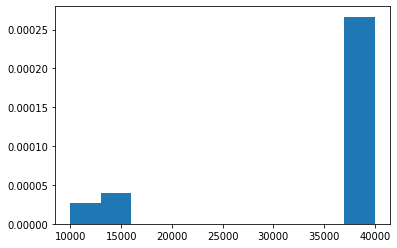

In [4]:
N = 50
plt.hist(u.rvs(size=N),
  density=True,
  label='Observations')
plt.show()

## Histogram $N=500$

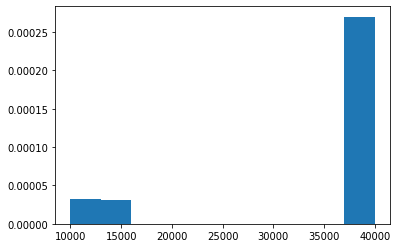

In [5]:
N = 500
plt.hist(u.rvs(size=N),
  density=True,
  label='Observations')
plt.show()

## The Binomial Distribution

For $n = 1 \ldots N$, the **binomial distribution** is defined by the
PMF $$
\displaystyle 
\begin{aligned}
\mathbb{P}(X = n) &= \binom{N}{n} \theta^n (1-\theta)^{N-n}\\
\mathbb{E}(X) &= \sum_{n=0}^N n \binom{N}{n} \theta^n (1-\theta)^{N-n} = N \theta
\end{aligned}
$$

In [6]:
N = 10
θ = 0.5
u = scipy.stats.binom(N, θ)
print(f"Mean: {u.mean():.2f}")
print(f"Variance: {u.var():.2f}")
print(f"Draws of u: {u.rvs(5)}")

Mean: 5.00
Variance: 2.50
Draws of u: [5 3 4 4 7]

## The Binomial Probability Mass Function

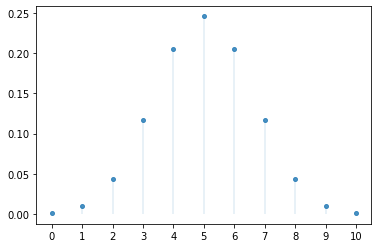

In [7]:
grid = np.arange(N+1)
u_pmf = u.pmf(grid)

fig, ax = plt.subplots()
ax.plot(grid, u_pmf,
  linestyle='',
  marker='o',
  alpha=0.8, ms=4)
ax.vlines(grid, 0,
  u_pmf,
  lw=0.2)
ax.set_xticks(grid)
plt.show()

## The Binomial Cumulative Distribution Function

$$
\mathbb{P}(X \leq n) = \sum_{i=0}^n \binom{N}{i} \theta^i (1-\theta)^{N-i}
$$

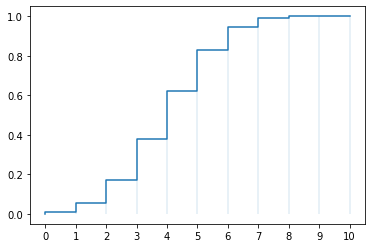

In [8]:
grid = np.arange(N+1)
u_cdf = u.cdf(grid)

fig, ax = plt.subplots()
ax.step(grid, u_cdf)
ax.vlines(grid, 0, u_cdf,
  lw=0.2)
ax.set_xticks(grid)
plt.show()

## Histogram $N=50$

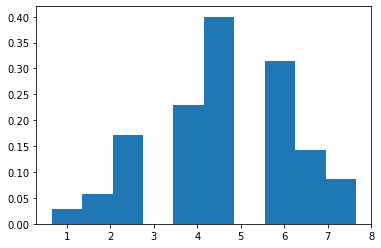

In [9]:
N = 50
u = scipy.stats.binom(10, 0.5)
plt.hist(u.rvs(size=N),
  density=True,
  align='left')
plt.show()

## Histogram $N=5000$

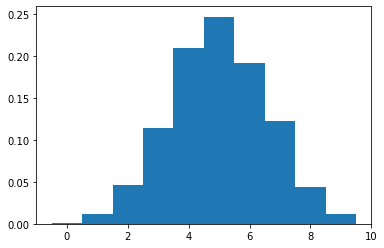

In [10]:
N = 5000
u = scipy.stats.binom(10, 0.5)
plt.hist(u.rvs(size=N),
  density=True,
  align='left')
plt.show()

# LLN and CLT

## Law of Large Numbers (LLN)

-   A classic LLN is the [Strong Law of Large
    Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers#Strong_law)

-   Take a sequence of independent, identically distributed random
    variables $X_1, X_2, \ldots$ with $\mathbb{E}[X_i] = \mu$ and
    $\mathbb{V}[X_i] = \sigma^2 < \infty$. Then,

    -   If $X_n$ is a random variable then
        $bar{X}_N \equiv \sum_{i=1}^N X_n$ is also a random variable
    -   The law says for any $\epsilon$,
        $\lim_{N\to\infty} \mathbb{P}(|\bar{X}_N - \mu| > \epsilon) \rightarrow 0$
    -   Sometimes denoted $\bar{X}_N \xrightarrow{p} \mu$ for
        “convergence in probability”

-   Powerful and frequently used, but remember assumptions!

## Visualizing the LLN with Gaussians $N=20$

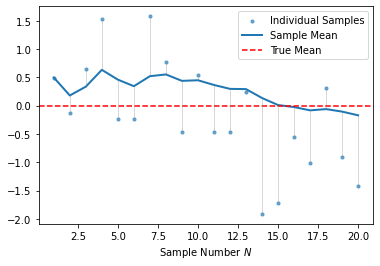

In [11]:
N = 20  # Number of samples
mu, sigma = 0, 1
np.random.seed(42)
samples = np.random.normal(mu, sigma, N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(mu, color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Visualizing the LLN with Gaussians $N=100$

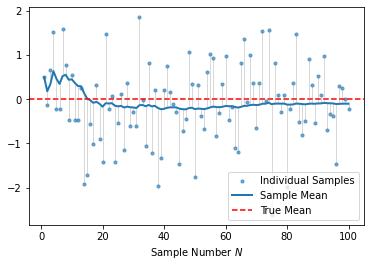

In [12]:
N = 100  # Number of samples
mu, sigma = 0, 1
np.random.seed(42)
samples = np.random.normal(mu, sigma, N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(mu, color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Pareto Distributions

-   Pareto distributions are a family of distributions with a power-law
    tail

-   Parameterized by $(x_m, \alpha)$ with the PDF $$
    p(x) = \frac{\alpha x_m^{\alpha}}{x^{\alpha+1}}
    $$

-   The mean is $\mathbb{E}[X] = \frac{\alpha x_m}{\alpha - 1}$ for
    $\alpha > 1$

-   The variance is
    $\mathbb{V}[X] = \frac{\alpha x_m^2}{(\alpha - 1)^2(\alpha - 2)}$
    for $\alpha > 2$

A distribution with pdf $p(x)$ is powerlaw if $p(x) \propto x^{-\alpha}$
for some $\alpha > 0$ as $x \rightarrow \infty$. More formally, if
$\lim_{x\to\infty}\frac{\log p(x)}{\log x} = -\alpha$

## Visualizing the Samples means for a Pareto Distribution

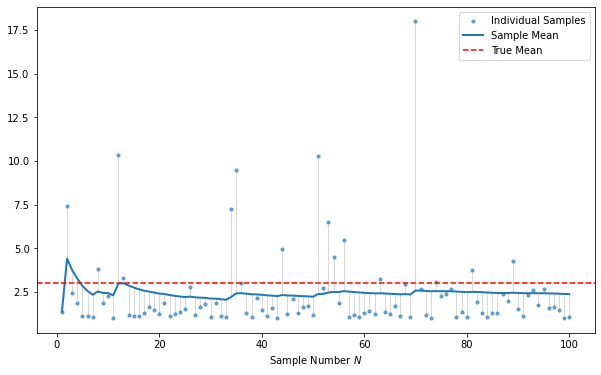

In [13]:
N = 100 # Number of samples
alpha = 1.5
np.random.seed(42)
dist = scipy.stats.pareto(alpha)
samples = dist.rvs(size=N)
sample_means = np.cumsum(samples) / np.arange(1, N + 1)
plt.figure(figsize=(10, 6))
plt.scatter(range(1, N + 1), samples, label='Individual Samples', alpha=0.6, s=10)
plt.plot(range(1, N + 1), sample_means, label='Sample Mean', linewidth=2)
plt.axhline(dist.mean(), color='r', linestyle='--', label='True Mean')
for n in range(N): # add lines to samples from sample mean
    plt.plot([n + 1, n + 1], [sample_means[n], samples[n]], color='gray', linewidth=0.5, alpha=0.6)
plt.xlabel('Sample Number $N$')
plt.legend()
plt.show()

## Central Limit Theorem (CLT)

-   The [Central Limit
    Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) (CLT)
    is a classic result in statistics

-   Again, lets assume we have IID observations with
    $\mathbb{E}[X_i] = \mu$ and $\mathbb{V}[X_i] = \sigma^2 < \infty$

-   Define the sample mean
    $\bar{X}_N \equiv \frac{1}{N} \sum_{i=1}^N X_i$

-   Then the CLT is

    $$
    \sqrt{n} \left( \bar{X}_n - \mu \right) \xrightarrow{d} \mathcal{N}(0, \sigma^2)
    $$

    -   That notation means [converges in
        distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution),
        which roughly means that as $n\to\infty$ the CDF are getting
        closer to each other

## Visualizing the CLT with Exponential Distributions

-   See [QuantEcon CLT
    lecture](https://python.quantecon.org/lln_clt.html#clt) for the
    source.
-   Exponential distributions $p(x) = \lambda e^{-\lambda x}$ for
    $\lambda = 0.5$

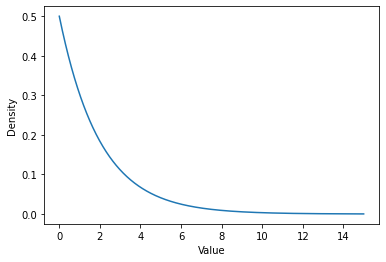

In [14]:
x = np.linspace(0, 15, 1000)
y = scipy.stats.expon.pdf(x, scale=1/0.5)
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## CLT Visualization at $n=10$

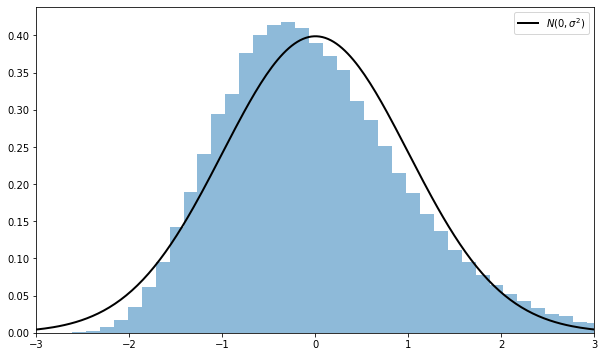

In [15]:
# Set parameters
n = 10                  # Choice of n
k = 100000               # Number of draws of Y_n
distribution = scipy.stats.expon(2)  # Exponential distribution, λ = 1/2
μ, s = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, scipy.stats.norm.pdf(xgrid, scale=s), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()
plt.show()

## CLT visualization at $n=250$

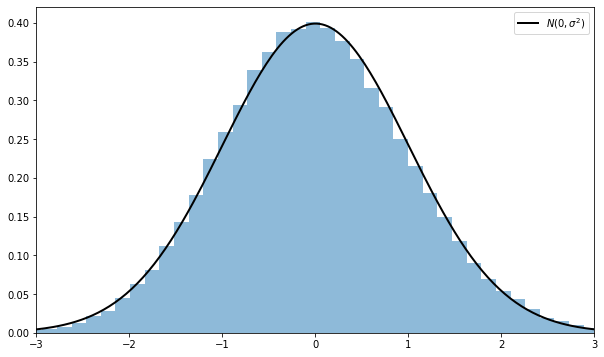

In [16]:
# Set parameters
n = 250                  # Choice of n
k = 100000               # Number of draws of Y_n
distribution = scipy.stats.expon(2)  # Exponential distribution, λ = 1/2
μ, s = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, scipy.stats.norm.pdf(xgrid, scale=s), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()
plt.show()

# Joint Distributions

## Joint Probability Distributions

-   Key concepts are **marginal distributions**, **conditional
    distributions**, **independence**, and **conditional expectations**
-   Will demonstrate with bivariate discretely valued distributions
    -   Similar for multivariate distributions, except we replace sums
        with sums over multiple indices
    -   Similar for continuous or mixed discrete-continuous
        distributions, except we replace sums with integrals
-   Interpretation of the joint distribution of $X$ and $Y$ is the
    probability of each pair of outcomes occurs
    -   e.g., prob you get a cash transfer and are unemployed, don’t get
        a cash transfer and are unemployed, get a cash transfer and are
        employed, etc.

## Bivariate Probability Distributions

-   Let $X,Y$ be two discrete random variables that take values:

    $$
    X\in\{1,\ldots,I\},\quad Y\in\{1,\ldots,J\}
    $$

-   Then their **joint distribution** is described by a matrix

    $$
    P\equiv[\mathbb{P}(X=i,Y=j)]_{i=1\ldots I, j=1,\ldots J}\in \mathbb{R}^{I\times J}
    $$

-   Which fulfills the key axioms of probability $$
    \begin{aligned}
    p_{ij}\equiv\mathbb{P}(X=i,Y=j) &\geq 0\\
    \sum_{i=1}^{I}\sum_{j=1}^{J}p_{ij}=1
    \end{aligned}
    $$

## Marginal Probability Distributions

-   The joint distribution induces marginal distributions

    $$
    \begin{aligned}
    \mathbb{P}(X=i)& = \sum_{j=1}^{J}p_{ij} = \mu_i, \quad i=1,\ldots,I\\
    \mathbb{P}(Y=j)&= \sum_{i=1}^{I}p_{ij} = \nu_j, \quad j=1,\ldots,J 
    \end{aligned}
    $$

-   The marginal distributions are also probability distributions

    -   i.e., $\mu_i \geq 0$ and $\sum_{i=1}^{I} \mu_i = 1$
    -   e.g. the probability you were given a conditional cash transfer
        regardless of your employment status

## Conditional Probability

-   Conditional probabilities are defined according to

    $$
    \mathbb{P}(A \,|\, B)=\frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)}
    $$

-   $A \cap B$ is the event that both $A$ and $B$ occur, i.e., the
    intersection

    -   e.g. you were given a conditional cash transfer AND you were
        unemployed

-   The conditional probability is the probability of $A$ given $B$ has
    occurred

    -   e.g. the probability you were given a conditional cash transfer
        given you were unemployed

## Conditional Distributions

For a pair of discrete random variables, we have the **conditional
distribution**

$$
\mathbb{P}(X=i|Y=j)=\frac{p_{ij}}{\sum_{i=1}^{I}p_{ij}} 
=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(Y=j)}
$$

-   Fix $Y=j$, then the conditional distribution of $X \,|\,Y=j$ is a
    probability distribution. Trivially positive since $p_ij \geq 0$.
    Verify it sums to $1$

$$
\sum_{i=1}^{I}\mathbb{P}(X=i\,|\,Y=j)
=\frac{\sum_{i=1}^{I}p_{ij}}{\sum_{i=1}^{I}p_{ij}}=1
$$

## Statistical Independence

-   Random variables $X \sim p$ and $Y \sim g$ are statistically
    **independent** if

$$ 
\mathbb{P}(X=i,Y=j)=p_i g_j,\text{ for all } i, j
$$

-   i.e., the joint distribution is the product of the marginal
    distributions
-   e.g., the probability you were given a conditional cash transfer AND
    you were unemployed is probability you were given a conditional cash
    transfer $\times$ the probability you were unemployed

## Conditional Distributions and Independence

-   When $X$ and $Y$ are independent, use the definitions of conditional
    and marginal distributions $$
    \begin{aligned}
    \mathbb{P}(X=i\,|\,Y=j) &=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(Y=j)} =\frac{p_ig_j}{\sum_{i=1}^{I}p_ig_j}=\frac{p_ig_j}{g_j}=p_i \\
    \mathbb{P}(Y=j\,|\,X=i) &=\frac{\mathbb{P}(X=i, Y=j)}{\mathbb{P}(X=i)} =\frac{p_ig_j}{\sum_{j=1}^{J}p_ig_j}=\frac{p_ig_j}{p_i}=g_j
    \end{aligned}
    $$

-   i.e, independent $X$ and $Y$ implies the conditional distributions
    are the marginals

    -   $\mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)$ and
        $\mathbb{P}(Y=j\,|\,X=i) = \mathbb{P}(Y=j)$

## Notation for (Conditional) Independence

-   Let $X, Y, Z$ be random variables

-   Common notation for independence is

    $$
    \begin{aligned}
    X &\perp Y\\
    \mathbb{P}(X=x, Y=y) &= \mathbb{P}(X=x) \mathbb{P}(Y=y)
    \end{aligned}
    $$

-   Common notation for conditionial independence

    $$
    \begin{aligned}
    X &\perp\!\!\!\perp Y \,|\, Z\\
    \mathbb{P}(X=x, Y=y | Z=z) &= \mathbb{P}(X=x | Z=z) \mathbb{P}(Y=y | Z=z)
    \end{aligned}
    $$

-   Central to causal inference and treatment effects

## Classic Example of Conditional Independence

-   Let $X$ be the number of cigarettes smoked per day
-   Let $Y$ be the number of years of life remaining
-   Let $Z$ be the number of years of smoking
-   Then $X \perp\!\!\!\perp Y \,|\, Z$
    -   i.e., the number of cigarettes smoked per day is independent of
        the number of years of life remaining given the number of years
        of smoking
    -   i.e., the number of cigarettes smoked per day is independent of
        the number of years of life remaining given the number of years
        of smoking

## Simpson’s “Paradox”

-   [Simpson’s
    paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox) is a
    warning on composition effects
-   Recall the law of total probability
    $\mathbb{P}(X = x| Y=y) = \sum_{z} \mathbb{P}(X = x| Y=y, Z=z) \mathbb{P}(Z=z| Y=y)$
-   Lets say you see $\mathbb{P}(X| Y=y_1) > \mathbb{P}(X| Y=y_2)$
    -   Might suggests positive relationship on $X$ and $Y$?
-   If $\mathbb{P}(X| Y=y_1, Z=z) < \mathbb{P}(X| Y=y_2, Z=z)$ for many
    $z$ then
    -   $X$ and $Y$ may have a negative relationship after conditioning
        on $Z$?

## UC Berkeley Gender Bias: Overall Data

| Total Applicants | Admitted | Men Applicants | Men Admitted                                       | Women Applicants | Women Admitted |
|-------------|---------|-------------|------------|---------------|-------------|
| 12,763           | 41%      | 8,442          | <span style="background-color:#9EFF9E;">44%</span> | 4,321            | 35%            |

-   Classic example is the [Berkeley Gender
    Bias](https://en.wikipedia.org/wiki/Simpson%27s_paradox#UC_Berkeley_gender_bias)
    is a classic example of [Simpson’s
    paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)
-   But if you look at individual deparments the results are different
-   Seemed to show that 4 out of 85 departments had significant bias
    against women and 6 significant bias against men
-   But the biggest difference was in which departments women appied to
-   The following shows the top 6 departments to get a sense of
    heterogeneity

## Conditional Probabilities for 6 Largest Departments

| Dept | All Applicants | Admitted | Men Applicants                                      | Men Admitted                                       | Women Applicants                                    | Women Admitted                                     |
|------|------------|--------|------------|-----------|-------------|------------|
| A    | 933            | 64%      | <span style="background-color:#FE9;">**825**</span> | 62%                                                | 108                                                 | <span style="background-color:#9EFF9E;">82%</span> |
| B    | 585            | 63%      | <span style="background-color:#FE9;">**560**</span> | 63%                                                | 25                                                  | <span style="background-color:#9EFF9E;">68%</span> |
| C    | 918            | 35%      | 325                                                 | <span style="background-color:#9EFF9E;">37%</span> | <span style="background-color:#FE9;">**593**</span> | 34%                                                |
| D    | 792            | 34%      | <span style="background-color:#FE9;">417</span>     | 33%                                                | 375                                                 | <span style="background-color:#9EFF9E;">35%</span> |
| E    | 584            | 25%      | 191                                                 | <span style="background-color:#9EFF9E;">28%</span> | <span style="background-color:#FE9;">**393**</span> | 24%                                                |
| F    | 714            | 6%       | <span style="background-color:#FE9;">373</span>     | 6%                                                 | 341                                                 | <span style="background-color:#9EFF9E;">7%</span>  |

<span style="background-color:#FE9;">greater number of applicants than
other gender</span> and <span style="background-color:#9EFF9E;">less
number of applicants than other gender</span> **bold** the two “most
applied for” deparmtents for each gender

## Explanation Using Conditional Probabilities

Overall, $\mathbb{P}(\text{Admitted | Men}) = 0.44$ and
$\mathbb{P}(\text{Admitted | Women}) = 0.35$

But this is different when conditioning on departments!

-   $\mathbb{P}(\text{Admitted | Men, A}) = 0.62$,
    $\mathbb{P}(\text{Admitted | Women, A}) = 0.82$
-   $\mathbb{P}(\text{Admitted | Men, B}) = 0.63$,
    $\mathbb{P}(\text{Admitted | Women, B}) = 0.68$
-   “Paradox” because women tend to apply to more competitive
    departments

## Does this Old Data Imply There was No Bias?

-   All data requires assumptions to interpret! Most assumptions are
    implicit, so you need to reflect on what assumptions you may have
    made
-   This simply corrected for the mechanical composition effect
-   Interpreting bias better requires reflecting on your “model” and
    assumptions
    -   Is average quality is identical conditional on department and
        gender? Especially in 1973 when there was enormous selection
        bias?
    -   What if bias leads women to apply to the more competitive
        departments?

## Bayes’ Law

Conditional probability is used for **Bayes’ Law**:

$$
\mathbb{P}(A \,|\, B)=\frac{\mathbb{P}(B \,|\, A)\mathbb{P}(A)}{\mathbb{P}(B)}
$$

Sometimes:

-   $\mathbb{P}(B\,|\,A)$ is called the “likelihood”
-   $\mathbb{P}(A)$ is called the “prior”
-   $\mathbb{P}(A\,|\,B)$ is called the “posterior”
-   $\mathbb{P}(B)$ is called the “marginal likelihood”, which
    normalizes the expression

## Example with Bayes’ Law

$A$ is the event of being unemployed, $B$ is the event of getting a cash
transfer

-   $\mathbb{P}(B\,|\,A)$ is the probability of being given a cash
    transfer given you were unemployed
-   $\mathbb{P}(A)$ is the probability of being unemployed within the
    whole distribution
-   $\mathbb{P}(A\,|\,B)$ is the probability of being unemployed given
    you were given a cash transfer
-   $\mathbb{P}(B)$ is the probability of being given a cash transfer
    within the whole distribution
-   **Bayes’ law**: probability of being unemployed given you were given
    a cash transfer $\propto$ probability of being given cash transfer
    given you were unemployed $\times$ probability of being unemployed

## Bayes Law with Bivariate Random Variables

-   For discrete bi-variate random variables, we can write Bayes’ Law as

    $$
    \mathbb{P}(X=i\,|\,Y=j)=\frac{\mathbb{P}(X=i,Y=j)}{\mathbb{P}(Y=j)}=\frac{\mathbb{P}(Y=j\,|\,X=i)\mathbb{P}(X=i)}{\mathbb{P}(Y=j)}
    $$

-   If $X$ and $Y$ are independent

    -   $\mathbb{P}(Y=j\,|\,X=i) = \mathbb{P}(Y=j)$
    -   Bayes’ Law simplifies to just the marginal distribution

    $$
    \mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)
    $$

## Conditional Expectation

-   Recall: $\mathbb{P}(X=i\,|\,Y=j)$ is itself a probability
    distribution if we vary $j$

-   A **conditional expectation** is an expectation using the
    conditional probability distribution. For a discrete random variable
    $X$ and $Y$, $$
    \mathbb{E}[X\,|\,Y=j] = \sum_{i=1}^{I} i\, \mathbb{P}(X=i\,|\,Y=j)
    $$

-   If $X$ and $Y$ are independent then

    -   Recall that $\mathbb{P}(X=i\,|\,Y=j) = \mathbb{P}(X=i)$
    -   Which impllies $\mathbb{E}[X\,|\,Y=j] = \mathbb{E}[X]$
    -   That the expected value of $X$ is the same regardless of the
        value of $Y$

## Key Properties of Expectations

-   Let $A$ and $B$ be scalar/vector/matrix constants, and $X$ and $Y$
    are scalar/vector/matrix random variables

-   Expectations are **linear operators**, which gives us some useful
    properties

    -   $\mathbb{E}[A X + B Y] = A \mathbb{E}[X] + B \mathbb{E}[Y]$

-   $\mathbb{E}[X Y] \neq \mathbb{E}[X] \mathbb{E}[Y]$ in general

    -   But if $X$ and $Y$ are independent, then
        $\mathbb{E}[X Y] = \mathbb{E}[X] \mathbb{E}[Y]$

-   $\mathbb{E}[f(X)] \neq f(\mathbb{E}[X])$ in geneal

    -   Unless $f(\cdot)$ is linear or if $X$ is degenerate (i.e., a
        constant)

-   **Jensen’s Inequality**: If $f(\cdot)$ is a convex function, then
    $\mathbb{E}[f(X)] \geq f(\mathbb{E}[X])$

## Law of Total Probability

-   **Law of Total Probability** is a useful identity for conditional
    probabilities
    -   Let $A_1, \ldots, A_N$ be a partition of $\Omega$
    -   i.e., $\Omega = \cup_{i=1}^{N} A_i$ and
        $A_i \cap A_j = \emptyset$ for $i \neq j$
-   Then for any event $B$, $$
    \mathbb{P}(B) = \sum_{i=1}^{N} \mathbb{P}(B \cap A_i) = \sum_{i=1}^{N} \mathbb{P}(B \,|\, A_i) \mathbb{P}(A_i)
    $$
    -   e.g. the probability of being unemployed is the probability of
        being unemployed and getting a cash transfer plus the
        probability of being unemployed and not getting a cash transfer

## Law of Total Expectations

-   Let $\{A_1, \ldots, A_N\}$ be a partition of $\Omega$. For any
    random variable $X$,
-   **Law of Total Expectations**

$$
  \mathbb{E}[X] = \sum_{i=1}^{N} \mathbb{E}[X \,|\, A_i] \mathbb{P}(A_i)
$$

-   e.g. the expected value of income is the expected value of income
    given you were unemployed times the probability of being unemployed
    plus the expected value of income given you were employed times the
    probability of being employed

Related decomposition is the [Law of Total
Variances](https://en.wikipedia.org/wiki/Law_of_total_variance):
$\mathbb{V}[X] = \mathbb{E}[\mathbb{V}[Y\,|\,X]] + \mathbb{V}[\mathbb{E}[Y\,|\,X]]$

## Conditional Expectations and Iterated Expectations

-   Same properties all hold
    e.g. $\mathbb{E}[A X + B Y \,|\, Z] = A \mathbb{E}[X \,|\, Z] + B \mathbb{E}[Y \,|\, Z]$

-   Conditional expectations are themselves random variables if the
    conditional is. e.g. $\mathbb{E}[X \,|\, Y]$ is a random variable in
    $Y$

-   **Law of Iterated Expectations**

    $$
    \mathbb{E}\left[\mathbb{E}[X\,|\,Y]\right] = \mathbb{E}[X]
    $$

    -   The expected value of $X$ is the average of the conditional
        expectations of $X$ given $Y$ over the distribution of $Y$
    -   Similarly for conditionals:
        $\mathbb{E}\left[\mathbb{E}[X\,|\,Y, Z]\, |\, Z\right] = \mathbb{E}[X\,|\,Z]$